<a href="https://colab.research.google.com/github/sgusproject/PythonDataframe-Learn/blob/main/6_StockIndicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALCULATE STOCK INDICATORS
<li>Pct change</li>
<li>Log returns</li>
<li>Standard Deviation (Volatility)</li>
<li>Rolling</li>
    <li>Simple Moving Average</li>
    <li>Exponential Moving Average</li>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# using Boeing data
data = pd.read_csv("BA.csv", index_col=0, parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-23,178.000000,182.500000,175.419998,176.449997,176.449997,29587200
2020-07-24,175.679993,181.100006,173.600006,173.759995,173.759995,28548000
2020-07-27,173.190002,174.139999,169.000000,170.210007,170.210007,30243800
2020-07-28,168.500000,173.740005,168.229996,170.839996,170.839996,25349100
2020-07-29,172.899994,173.009995,162.250000,166.009995,166.009995,51709600


In [4]:
# Pct change calculation
data['%-chg'] = data['Close'].pct_change()

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2020-07-23,178.000000,182.500000,175.419998,176.449997,176.449997,29587200,NaN
2020-07-24,175.679993,181.100006,173.600006,173.759995,173.759995,28548000,-0.015245
2020-07-27,173.190002,174.139999,169.000000,170.210007,170.210007,30243800,-0.020430
2020-07-28,168.500000,173.740005,168.229996,170.839996,170.839996,25349100,0.003701
2020-07-29,172.899994,173.009995,162.250000,166.009995,166.009995,51709600,-0.028272


In [6]:
import numpy as np

In [7]:
#  Log returns calculation
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2020-07-23,178.000000,182.500000,175.419998,176.449997,176.449997,29587200,NaN,NaN
2020-07-24,175.679993,181.100006,173.600006,173.759995,173.759995,28548000,-0.015245,-0.015363
2020-07-27,173.190002,174.139999,169.000000,170.210007,170.210007,30243800,-0.020430,-0.020642
2020-07-28,168.500000,173.740005,168.229996,170.839996,170.839996,25349100,0.003701,0.003694
2020-07-29,172.899994,173.009995,162.250000,166.009995,166.009995,51709600,-0.028272,-0.028679


In [9]:
data['Log returns'].std()

0.027016475176248302

In [10]:
# Volatility by Log returns
volatility = data['Log returns'].std()*252**.5

In [11]:
volatility

0.42887324770741747

In [12]:
str_vol = str(round(volatility, 4)*100)

In [13]:
str_vol

'42.89'

Text(0.5, 1.0, 'BA volatility: 42.89%')

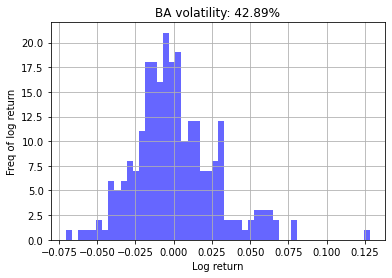

In [14]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("BA volatility: " + str_vol + "%")

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2020-07-23,178.000000,182.500000,175.419998,176.449997,176.449997,29587200,NaN,NaN
2020-07-24,175.679993,181.100006,173.600006,173.759995,173.759995,28548000,-0.015245,-0.015363
2020-07-27,173.190002,174.139999,169.000000,170.210007,170.210007,30243800,-0.020430,-0.020642
2020-07-28,168.500000,173.740005,168.229996,170.839996,170.839996,25349100,0.003701,0.003694
2020-07-29,172.899994,173.009995,162.250000,166.009995,166.009995,51709600,-0.028272,-0.028679


In [16]:
# Simple Moving Average 10 calculation
data['MA10'] = data['Close'].rolling(10).mean()

In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10
Date,,,,,,,,,
2021-07-16,223.110001,224.000000,217.029999,217.740005,217.740005,12388900,-0.022535,-0.022793,231.239998
2021-07-19,211.179993,211.550003,204.800003,206.990005,206.990005,24123600,-0.049371,-0.050631,228.270999
2021-07-20,208.100006,217.369995,206.619995,217.149994,217.149994,17009300,0.049084,0.047918,226.371999
2021-07-21,219.500000,224.089996,218.899994,222.539993,222.539993,11421000,0.024822,0.024518,225.447998
2021-07-22,221.520004,222.250000,218.309998,220.869995,220.869995,9754300,-0.007504,-0.007533,223.857997


In [18]:
# Simple Moving Average 50 calculation
data['MA200'] = data['Close'].rolling(200).mean()

In [19]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA200
Date,,,,,,,,,,
2021-07-16,223.110001,224.000000,217.029999,217.740005,217.740005,12388900,-0.022535,-0.022793,231.239998,219.04570
2021-07-19,211.179993,211.550003,204.800003,206.990005,206.990005,24123600,-0.049371,-0.050631,228.270999,219.25435
2021-07-20,208.100006,217.369995,206.619995,217.149994,217.149994,17009300,0.049084,0.047918,226.371999,219.50080
2021-07-21,219.500000,224.089996,218.899994,222.539993,222.539993,11421000,0.024822,0.024518,225.447998,219.77310
2021-07-22,221.520004,222.250000,218.309998,220.869995,220.869995,9754300,-0.007504,-0.007533,223.857997,220.02145


In [20]:
# Exponential Moving Average
data['EMA10']= data['Close'].ewm(span=10, adjust =False).mean()

In [21]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA200,EMA10
Date,,,,,,,,,,,
2021-07-16,223.110001,224.000000,217.029999,217.740005,217.740005,12388900,-0.022535,-0.022793,231.239998,219.04570,229.628978
2021-07-19,211.179993,211.550003,204.800003,206.990005,206.990005,24123600,-0.049371,-0.050631,228.270999,219.25435,225.512801
2021-07-20,208.100006,217.369995,206.619995,217.149994,217.149994,17009300,0.049084,0.047918,226.371999,219.50080,223.992291
2021-07-21,219.500000,224.089996,218.899994,222.539993,222.539993,11421000,0.024822,0.024518,225.447998,219.77310,223.728236
2021-07-22,221.520004,222.250000,218.309998,220.869995,220.869995,9754300,-0.007504,-0.007533,223.857997,220.02145,223.208556


In [22]:
# Exponential Moving Average
data['EMA200']= data['Close'].ewm(span=200, adjust =False).mean()

In [23]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA200,EMA10,EMA200
Date,,,,,,,,,,,,
2021-07-16,223.110001,224.000000,217.029999,217.740005,217.740005,12388900,-0.022535,-0.022793,231.239998,219.04570,229.628978,222.197554
2021-07-19,211.179993,211.550003,204.800003,206.990005,206.990005,24123600,-0.049371,-0.050631,228.270999,219.25435,225.512801,222.046235
2021-07-20,208.100006,217.369995,206.619995,217.149994,217.149994,17009300,0.049084,0.047918,226.371999,219.50080,223.992291,221.997517
2021-07-21,219.500000,224.089996,218.899994,222.539993,222.539993,11421000,0.024822,0.024518,225.447998,219.77310,223.728236,222.002914
2021-07-22,221.520004,222.250000,218.309998,220.869995,220.869995,9754300,-0.007504,-0.007533,223.857997,220.02145,223.208556,221.991642


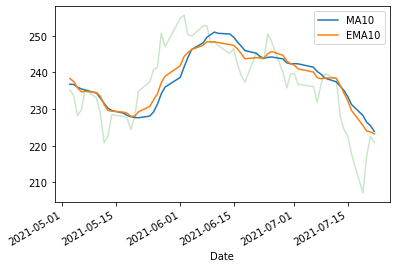

In [24]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2021-5-01':].plot(ax=ax)
data['Close'].loc['2021-5-01':].plot(ax=ax, alpha=0.25)

# Stock price Vs SMA10 & EMA10